* Output variable -> y
* y -> Whether the client has subscribed a term deposit or not 
* Binomial ("yes" or "no")
Attribute information For bank dataset

   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: None


In [25]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
bank = pd.read_csv('bank-full.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA

In [3]:
bank.shape

(45211, 17)

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### extract the columns 

In [5]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### select the columns 'age', 'balance', 'duration', 'campaign', 'y'

In [6]:
bank['outcome'] = bank.y.map({'no':0, 'yes':1})
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,outcome
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no,0


In [7]:
column =[ 'age', 'balance', 'duration', 'campaign', 'outcome']

In [8]:
bank1 = bank[column]

In [9]:
bank1.head()

,age,balance,duration,campaign,outcome
0,58,2143,261,1,0
1,44,29,151,1,0
2,33,2,76,1,0
3,47,1506,92,1,0
4,33,1,198,1,0


### Dividing our data into input and output variable

In [10]:
feature_col=['age','balance','duration','campaign']
output_target=['outcome']
X = bank1[feature_col]
Y = bank1[output_target]


In [11]:
classifier = LogisticRegression()

In [12]:
from sklearn.ensemble import RandomForestRegressor
pd.options.mode.chained_assignment = None

In [13]:
classifier.fit(X,Y.values.ravel())

LogisticRegression()

In [14]:
y_pred= classifier.predict_proba(X)
y_pred

array([[0.87367389, 0.12632611],
       [0.92488732, 0.07511268],
       [0.9459632 , 0.0540368 ],
       ...,
       [0.30553763, 0.69446237],
       [0.82336233, 0.17663767],
       [0.86407825, 0.13592175]])

In [15]:
# Evaluating the logistic regression model
# confusing matrix

In [17]:
y_pred = classifier.predict(X)

In [18]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_metrics = confusion_matrix(Y,y_pred)

In [23]:
confusion_metrics

array([[39342,   580],
       [ 4435,   854]], dtype=int64)

Text(33.0, 0.5, 'actual value')

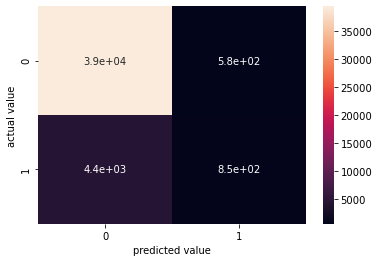

In [29]:
sns.heatmap(confusion_metrics, annot = True)
plt.xlabel ('predicted value')
plt.ylabel ('actual value')

In [33]:
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score

In [37]:
fpr, tpr, threashold = roc_curve(Y,classifier.predict_proba(X)[:,1])

In [38]:
auc = roc_auc_score (Y,y_pred)

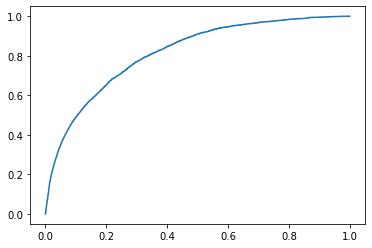

In [41]:
plt.plot(fpr,tpr,auc)

In [42]:
auc

0.5734694329116669